In [1]:
from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt
import h5py

import fastjet as fj

In [2]:
# Load files
fn_qcd =  '/Users/gregor/Dropbox/AnomalyDetection/events_qcd_AD.h5'
f_qcd = h5py.File(fn_qcd,'r')
qcd_data = f_qcd["table"].value

fn_sig =  '/Users/gregor/Dropbox/AnomalyDetection/events_Wprime_AD.h5'
f_sig = h5py.File(fn_sig,'r')
sig_data = f_sig["table"].value

print(qcd_data.shape) # Event / Constituent in Event / pT eta phj

(67402, 600, 3)


In [3]:
def run(data,n_events=1000):
    
    out = []
    
    # Loop over events
    for ievt in range(n_events):

        # Build a list of all particles
        pjs = []
        for i in range(data.shape[1]):
            pj = fj.PseudoJet()
            pj.reset_PtYPhiM(data[ievt,i,0],data[ievt,i,1],data[ievt,i,2],0)
            pjs.append(pj)

        # run jet clustering with AntiKt, R=1.0
        R = 1.0
        jet_def = fj.JetDefinition(fj.antikt_algorithm, R)

        # Save the two leading jets
        jets = jet_def(pjs)
        jets = [j for j in jets if j.pt()>30.]
        out.append([jets[0],jets[1]])
                
    return out

In [4]:
# Actually run
# (this may take a few minutes)
out_qcd = run(qcd_data)
out_sig = run(sig_data)

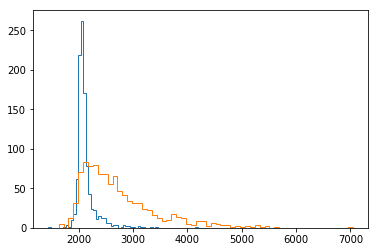

In [5]:
# Extract the leading dijet mass for signal..
dijet_m_sig = []
for evt in out_sig:
    dijet_m_sig.append( (evt[0]+evt[1]).m())

# ..and background
dijet_m_qcd = []
for evt in out_qcd:
    dijet_m_qcd.append( (evt[0]+evt[1]).m())

# and plot
_ = plt.hist(dijet_m_sig,label="Signal",bins=60,histtype='step')
_ = plt.hist(dijet_m_qcd,label="QCD",bins=60,histtype='step')